# Data epidemic of COVID-19 in Catalonia

The datoscovid.cat website comes into operation 28th of July 2020 to monitor the epidemiological epidemic of COVID-19 in Catalonia.

First, the imports for the notebook.

In [1]:
# Data
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Find Data 

We downloaded the data from https://dadescovid.cat/descarregues. You can download an updated version from the website.

You can also find other data in [transparenciacatalunya.cat](https://analisi.transparenciacatalunya.cat/Salut/Registre-de-defuncions-per-COVID-19-a-Catalunya-Se/uqk7-bf9s).



## SECOND PART USING DATA FROM MUNICIPALITY



**Objective**: Plot relationship between information of population and economy of the town and the number of cases on it.

For that we have access to data of the twon from [IDESCAT](https://www.idescat.cat)



In [2]:
# Load data
df_pandemic = pd.read_csv('data/casos_sexe_municipi.csv', sep=';')
print(df_pandemic.shape)
df_pandemic.head()

(73910, 9)


,TIPUSCASDATA,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,MUNICIPIDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,29/04/2020,21,MARESME,08110,MALGRAT DE MAR,1,Dona,Positiu per Test Ràpid,6
1,03/07/2020,40,VALLES OCCIDENTAL,08125,MONTCADA I REIXAC,1,Dona,Positiu per ELISA,1
2,28/07/2020,11,BAIX LLOBREGAT,08217,SANT JOAN DESPÍ,1,Dona,Positiu per Test Ràpid,7
3,25/07/2020,13,BARCELONES,08101,L'HOSPITALET DE LLOBREGAT,0,Home,PCR probable,6
4,28/08/2020,11,BAIX LLOBREGAT,08200,SANT BOI DE LLOBREGAT,1,Dona,Positiu per ELISA,1


Let's clean the data and prepare it for the analysis.

In [3]:
df_pandemic.isna().sum()

TIPUSCASDATA            0
COMARCACODI             0
COMARCADESCRIPCIO     418
MUNICIPICODI            0
MUNICIPIDESCRIPCIO    418
SEXECODI                0
SEXEDESCRIPCIO        387
TIPUSCASDESCRIPCIO      0
NUMCASOS                0
dtype: int64

In [4]:
df_pandemic = df_pandemic[df_pandemic['MUNICIPIDESCRIPCIO'].notna()]
print(df_pandemic.shape)

(73492, 9)


In [5]:
df_pandemic=df_pandemic.rename({'MUNICIPIDESCRIPCIO':'MUNICIPI'}, axis='columns')
print(df_pandemic.shape)
df_pandemic.head()

(73492, 9)


,TIPUSCASDATA,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,MUNICIPI,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,29/04/2020,21,MARESME,08110,MALGRAT DE MAR,1,Dona,Positiu per Test Ràpid,6
1,03/07/2020,40,VALLES OCCIDENTAL,08125,MONTCADA I REIXAC,1,Dona,Positiu per ELISA,1
2,28/07/2020,11,BAIX LLOBREGAT,08217,SANT JOAN DESPÍ,1,Dona,Positiu per Test Ràpid,7
3,25/07/2020,13,BARCELONES,08101,L'HOSPITALET DE LLOBREGAT,0,Home,PCR probable,6
4,28/08/2020,11,BAIX LLOBREGAT,08200,SANT BOI DE LLOBREGAT,1,Dona,Positiu per ELISA,1


In [6]:
# Sum all the number of cases for all the dates of every town.
df_pandemicMunicipi = df_pandemic
df_pandemicMunicipi = df_pandemic.groupby("MUNICIPI").sum()
print(df_pandemicMunicipi.shape)
df_pandemicMunicipi.head()

(898, 1)


,NUMCASOS
MUNICIPI,
ABRERA,365
AGRAMUNT,222
AGUILAR DE SEGARRA,4
AGULLANA,20
AIGUAFREDA,83


In [7]:
df_pandemicMunicipi.isna().sum()

NUMCASOS    0
dtype: int64

In [8]:
df_pandemicMunicipi.index.names = ['INDEX']
print(df_pandemicMunicipi.shape)
df_pandemicMunicipi.head()

(898, 1)


,NUMCASOS
INDEX,
ABRERA,365
AGRAMUNT,222
AGUILAR DE SEGARRA,4
AGULLANA,20
AIGUAFREDA,83


In [9]:
# Let's add a new column with the name of the town.
df_pandemicMunicipi['MUNICIPI'] = df_pandemicMunicipi.index
print(df_pandemicMunicipi.shape)
df_pandemicMunicipi.head()

(898, 2)


,NUMCASOS,MUNICIPI
INDEX,,
ABRERA,365,ABRERA
AGRAMUNT,222,AGRAMUNT
AGUILAR DE SEGARRA,4,AGUILAR DE SEGARRA
AGULLANA,20,AGULLANA
AIGUAFREDA,83,AIGUAFREDA


We load the data of population for the towns with more than 20.000 people. Source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=250)



In [10]:
df_population = pd.read_csv('data/aec-250.csv')
print(df_population.shape)
df_population.head()

(72, 5)


,Densitat de població. 2019,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Municipis amb més de 20.000 habitants,NaN,NaN,NaN,NaN
1,NaN,Població,NaN,NaN,NaN
2,NaN,NaN,Superfície,Densitat,Rang per
3,NaN,NaN,km2,hab./km2,nombre d'hab.
4,Barcelona,1636762,101.4,16149.6,1


Let's clean the data and prepare it for the analysis.

Remove the empty rows of the csv. Remove NaNs.

In [11]:
df_population=df_population.rename({'Densitat de població. 2019':'Municipis amb més de 20.000 habitants','Unnamed: 1':'Poblacio', 'Unnamed: 2': 'Superficie', 'Unnamed: 3':'Densitat', 'Unnamed: 4':'Rang per nombre hab.'}, axis='columns')
print(df_population.shape)
df_population.head()

(72, 5)


,Municipis amb més de 20.000 habitants,Poblacio,Superficie,Densitat,Rang per nombre hab.
0,Municipis amb més de 20.000 habitants,NaN,NaN,NaN,NaN
1,NaN,Població,NaN,NaN,NaN
2,NaN,NaN,Superfície,Densitat,Rang per
3,NaN,NaN,km2,hab./km2,nombre d'hab.
4,Barcelona,1636762,101.4,16149.6,1


In [12]:
df_population= df_population.drop([0, 1, 2, 3], axis=0)
print(df_population.shape)
df_population.head()

(68, 5)


,Municipis amb més de 20.000 habitants,Poblacio,Superficie,Densitat,Rang per nombre hab.
4,Barcelona,1636762,101.4,16149.6,1
5,Hospitalet de Llobregat. l',264923,12.4,21364.8,2
6,Terrassa,220556,70.2,3143.6,3
7,Badalona,220440,21.2,10407.9,4
8,Sabadell,213644,37.8,5653.5,5


In [13]:
df_population.reset_index(drop=True, inplace=True)
print(df_population.shape)
df_population.head()

(68, 5)


,Municipis amb més de 20.000 habitants,Poblacio,Superficie,Densitat,Rang per nombre hab.
0,Barcelona,1636762,101.4,16149.6,1
1,Hospitalet de Llobregat. l',264923,12.4,21364.8,2
2,Terrassa,220556,70.2,3143.6,3
3,Badalona,220440,21.2,10407.9,4
4,Sabadell,213644,37.8,5653.5,5


In [14]:
df_population.isna().sum()

Municipis amb més de 20.000 habitants    1
Poblacio                                 2
Superficie                               2
Densitat                                 2
Rang per nombre hab.                     2
dtype: int64

In [15]:
df_population.tail()

,Municipis amb més de 20.000 habitants,Poblacio,Superficie,Densitat,Rang per nombre hab.
63,Manlleu,20573,17.2,1194,64
64,Sant Quirze del Vallès,20141,14.1,1431.5,65
65,Franqueses del Vallès. les,20092,29.1,689.5,66
66,NaN,NaN,NaN,NaN,NaN
67,Institut d'Estadística de Catalunya,NaN,NaN,NaN,NaN


In [16]:
df_population= df_population.drop([66, 67], axis=0)
df_population.tail()

,Municipis amb més de 20.000 habitants,Poblacio,Superficie,Densitat,Rang per nombre hab.
61,Vilassar de Mar,20837,4,5209.3,62
62,Amposta,20738,138.3,149.9,63
63,Manlleu,20573,17.2,1194,64
64,Sant Quirze del Vallès,20141,14.1,1431.5,65
65,Franqueses del Vallès. les,20092,29.1,689.5,66


In [17]:
df_population.isna().sum()

Municipis amb més de 20.000 habitants    0
Poblacio                                 0
Superficie                               0
Densitat                                 0
Rang per nombre hab.                     0
dtype: int64

In [18]:
df_population=df_population.rename({'Municipis amb més de 20.000 habitants':'MUNICIPI'}, axis='columns')
print(df_population.shape)
df_population.head()

(66, 5)


,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.
0,Barcelona,1636762,101.4,16149.6,1
1,Hospitalet de Llobregat. l',264923,12.4,21364.8,2
2,Terrassa,220556,70.2,3143.6,3
3,Badalona,220440,21.2,10407.9,4
4,Sabadell,213644,37.8,5653.5,5


In [19]:
# Change to uppercase letters
df_population['MUNICIPI'] = df_population['MUNICIPI'].str.upper()
print(df_population.shape)
df_population.head()

(66, 5)


,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.
0,BARCELONA,1636762,101.4,16149.6,1
1,HOSPITALET DE LLOBREGAT. L',264923,12.4,21364.8,2
2,TERRASSA,220556,70.2,3143.6,3
3,BADALONA,220440,21.2,10407.9,4
4,SABADELL,213644,37.8,5653.5,5


Let's merge the information of the two tables df_pandemicMunicipi and df_population based on the town names.

In [20]:
# Merge the two tables based on the "MUNICIPI":
df_pandemic2 = pd.merge(df_pandemicMunicipi, df_population, how='right', on=['MUNICIPI'])
print(df_pandemic2.shape)
df_pandemic2.head()

(66, 6)


,NUMCASOS,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.
0,859.0,AMPOSTA,20738,138.3,149.9,63
1,9956.0,BADALONA,220440,21.2,10407.9,4
2,1115.0,BARBERÀ DEL VALLÈS,33091,8.3,3982.1,41
3,72038.0,BARCELONA,1636762,101.4,16149.6,1
4,1207.0,BLANES,39028,17.7,2210,31


In [21]:
df_pandemic2.isna().sum()

NUMCASOS                5
MUNICIPI                0
Poblacio                0
Superficie              0
Densitat                0
Rang per nombre hab.    0
dtype: int64

In [22]:
df_pandemic2.tail()

,NUMCASOS,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.
61,NaN,HOSPITALET DE LLOBREGAT. L',264923,12.4,21364.8,2
62,NaN,PRAT DE LLOBREGAT. EL,64599,31.4,2056.6,20
63,NaN,VENDRELL. EL,37606,36.8,1021.9,34
64,NaN,MASNOU. EL,23515,3.4,6936.6,57
65,NaN,FRANQUESES DEL VALLÈS. LES,20092,29.1,689.5,66


There are 5 towns without matching due to the article:
- L'HOSPITALET DE LLOBREGAT
- EL PRAT DE LLOBREGAT
- EL VENDRELL
- EL MASNOU 
- LES FRANQUESES DEL VALLÈS

We can change the manually.

In [23]:
df_population.replace(to_replace='HOSPITALET DE LLOBREGAT. L\'',value='HOSPITALET DE LLOBREGAT', regex=True, inplace=True)  
                      
df_pandemicMunicipi.replace('L\'HOSPITALET DE LLOBREGAT', 'HOSPITALET DE LLOBREGAT', regex=True, inplace=True)
df_population.replace('PRAT DE LLOBREGAT. EL', 'EL PRAT DE LLOBREGAT', regex=True, inplace=True)
df_population.replace('VENDRELL. EL', 'EL VENDRELL', regex=True, inplace=True)
df_population.replace('MASNOU. EL', 'EL MASNOU', regex=True, inplace=True)
df_population.replace('FRANQUESES DEL VALLÈS. LES', 'LES FRANQUESES DEL VALLÈS', regex=True, inplace=True)
df_population.head()

,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.
0,BARCELONA,1636762,101.4,16149.6,1
1,HOSPITALET DE LLOBREGAT,264923,12.4,21364.8,2
2,TERRASSA,220556,70.2,3143.6,3
3,BADALONA,220440,21.2,10407.9,4
4,SABADELL,213644,37.8,5653.5,5


In [24]:
# Merge the two tables based on the "MUNICIPI":
df_pandemic2 = pd.merge(df_pandemicMunicipi, df_population, how='right', on=['MUNICIPI'])
print(df_pandemic2.shape)
df_pandemic2.tail()

(66, 6)


,NUMCASOS,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.
61,766,VILA-SECA,22187,21.6,1025.3,60
62,2770,VILADECANS,66611,20.4,3265.3,19
63,1421,VILAFRANCA DEL PENEDÈS,39746,19.6,2022.7,30
64,1673,VILANOVA I LA GELTRÚ,67086,34,1973.7,17
65,522,VILASSAR DE MAR,20837,4,5209.3,62


In [25]:
df_pandemic2.isna().sum()

NUMCASOS                0
MUNICIPI                0
Poblacio                0
Superficie              0
Densitat                0
Rang per nombre hab.    0
dtype: int64

In [26]:
df_pandemic2['Poblacio'] = df_pandemic2['Poblacio'].astype(float)
print(df_pandemic2.shape)
df_pandemic2.head()

(66, 6)


,NUMCASOS,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.
0,859,AMPOSTA,20738.0,138.3,149.9,63
1,9956,BADALONA,220440.0,21.2,10407.9,4
2,1115,BARBERÀ DEL VALLÈS,33091.0,8.3,3982.1,41
3,72038,BARCELONA,1636762.0,101.4,16149.6,1
4,1207,BLANES,39028.0,17.7,2210,31


Do towns with a higher population have a higher incidence of covid?
Let's answer the question using a graphic

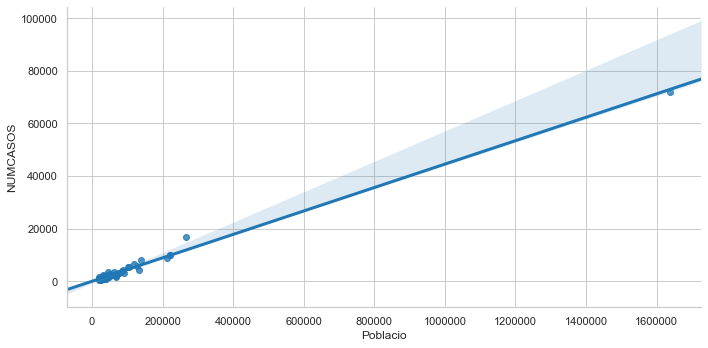

In [27]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

sns.lmplot( "Poblacio", "NUMCASOS",df_pandemic2, aspect=2)

Barcelona is an outlier in this dataset. Let's remove Barcelona for the plot.

In [28]:
df_pandemic2.head()

,NUMCASOS,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.
0,859,AMPOSTA,20738.0,138.3,149.9,63
1,9956,BADALONA,220440.0,21.2,10407.9,4
2,1115,BARBERÀ DEL VALLÈS,33091.0,8.3,3982.1,41
3,72038,BARCELONA,1636762.0,101.4,16149.6,1
4,1207,BLANES,39028.0,17.7,2210,31


In [29]:
df_pandemic2 = df_pandemic2.drop([3], axis=0)
df_pandemic2.reset_index(drop=True, inplace=True)
print(df_pandemic2.shape)
df_pandemic2.head()

(65, 6)


,NUMCASOS,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.
0,859,AMPOSTA,20738.0,138.3,149.9,63
1,9956,BADALONA,220440.0,21.2,10407.9,4
2,1115,BARBERÀ DEL VALLÈS,33091.0,8.3,3982.1,41
3,1207,BLANES,39028.0,17.7,2210,31
4,566,CALAFELL,26538.0,20.4,1302.2,51


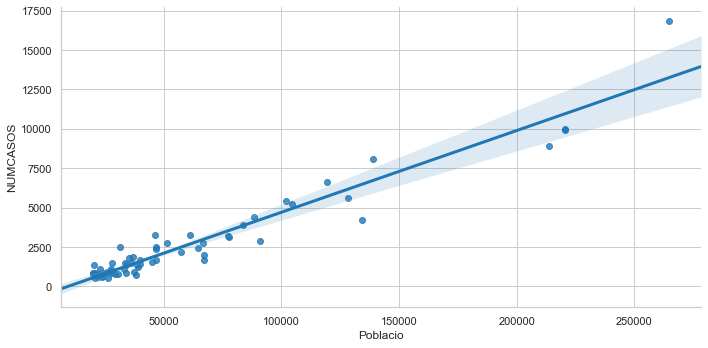

In [30]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

fig=sns.lmplot( "Poblacio", "NUMCASOS", df_pandemic2, aspect=2)

Let's compute the covid incidence as a ratio of cases per habitant.


In [31]:
df_pandemic2['RATIO'] = df_pandemic2['NUMCASOS'].to_numpy()/df_pandemic2['Poblacio'].to_numpy()
print(df_pandemic2.shape)
df_pandemic2.head()

(65, 7)


,NUMCASOS,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.,RATIO
0,859,AMPOSTA,20738.0,138.3,149.9,63,0.041422
1,9956,BADALONA,220440.0,21.2,10407.9,4,0.045164
2,1115,BARBERÀ DEL VALLÈS,33091.0,8.3,3982.1,41,0.033695
3,1207,BLANES,39028.0,17.7,2210,31,0.030927
4,566,CALAFELL,26538.0,20.4,1302.2,51,0.021328


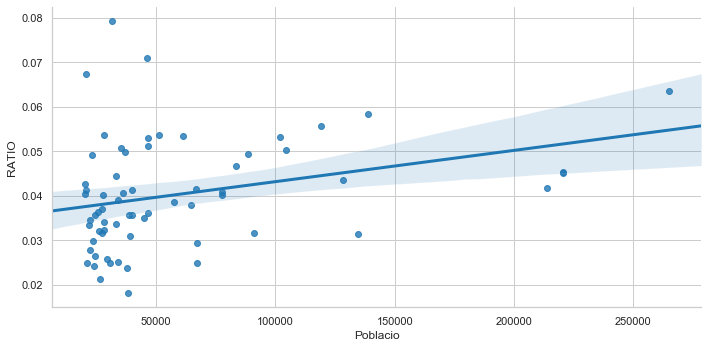

In [32]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

fig=sns.lmplot("Poblacio", "RATIO",  df_pandemic2, aspect=2)

Now, the conclusions seem different.

In Catalunya, the bigger the city the denser it is?

In [33]:
df_pandemic2.dtypes

NUMCASOS                  int64
MUNICIPI                 object
Poblacio                float64
Superficie               object
Densitat                 object
Rang per nombre hab.     object
RATIO                   float64
dtype: object

In [34]:
df_pandemic2['Densitat'] = df_pandemic2['Densitat'].astype(float)
print(df_pandemic2.shape)
df_pandemic2.head()

(65, 7)


,NUMCASOS,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.,RATIO
0,859,AMPOSTA,20738.0,138.3,149.9,63,0.041422
1,9956,BADALONA,220440.0,21.2,10407.9,4,0.045164
2,1115,BARBERÀ DEL VALLÈS,33091.0,8.3,3982.1,41,0.033695
3,1207,BLANES,39028.0,17.7,2210.0,31,0.030927
4,566,CALAFELL,26538.0,20.4,1302.2,51,0.021328


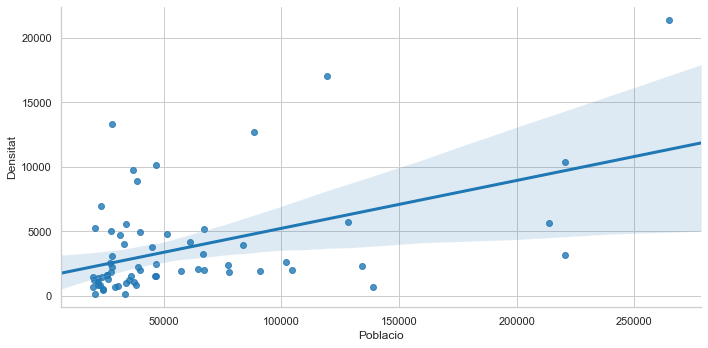

In [35]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

fig=sns.lmplot("Poblacio", "Densitat",  df_pandemic2, aspect=2)

Do towns with a higher population density have a higher incidence of covid?


In [36]:
df_pandemic2['Densitat'] = df_pandemic2['Densitat'].astype(float)
print(df_pandemic2.shape)
df_pandemic2.head()

(65, 7)


,NUMCASOS,MUNICIPI,Poblacio,Superficie,Densitat,Rang per nombre hab.,RATIO
0,859,AMPOSTA,20738.0,138.3,149.9,63,0.041422
1,9956,BADALONA,220440.0,21.2,10407.9,4,0.045164
2,1115,BARBERÀ DEL VALLÈS,33091.0,8.3,3982.1,41,0.033695
3,1207,BLANES,39028.0,17.7,2210.0,31,0.030927
4,566,CALAFELL,26538.0,20.4,1302.2,51,0.021328


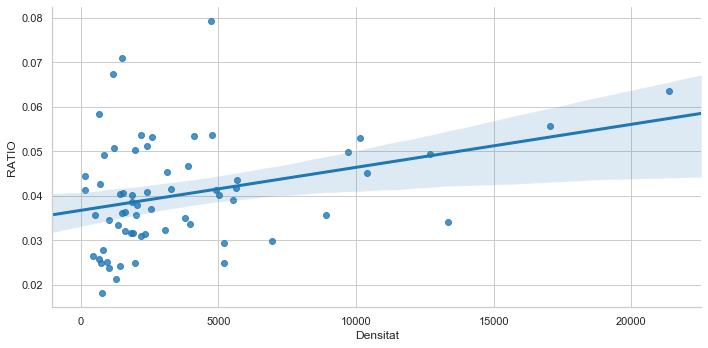

In [37]:
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

fig=sns.lmplot("Densitat", "RATIO",  df_pandemic2, aspect=2)

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**Exercise:** Think other possible questions which can be solved with the data.

</ol>
</div>

Now, let's move to other questions regarding economic information of the towns.

We can find data of the Producte interior brut territorial (PIB) (base 2017) for the anlaysis. Source [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=358)

In [38]:
# Load data of the PIB
df_pib = pd.read_csv('data/aec-358.csv')
print(df_pib.shape)
df_pib.head()

(45, 4)


,Comarques i Aran,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100
0,Alt Camp,"1505,9","34,1","109,4"
1,Alt Empordà,"3168,4","23,2","74,2"
2,Alt Penedès,"3201,2","29,9","95,8"
3,Alt Urgell,"450,6","22,3","71,4"
4,Alta Ribagorça,"122,4",32,"102,5"


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**Exercise:** Clean and combine the data in this table with the data in df_pandemicMunicipi to solve the question:
Do towns with a higher PIB have a lower incidence of covid?

</ol>
</div>

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**Exercise:** Think other possible questions which can be solved with this or other available data.

</ol>
</div>